# API Basics

Next, title your notebook appropriately with a top-level Markdown header, `#`. Do not use this level header anywhere else in the notebook. Our book build process will use this title in the navbar, table of contents, etc. Keep it short, keep it descriptive. Follow this with a `---` cell to visually distinguish the transition to the prerequisites section.

---

## Overview
This notebook will cover the terminology and steps needed to retrieve data from an API

1. Prerequisites
2. Motivation
3. API Terminology (and Status Codes)
4. Imports
7. Example: Weather API
8. Summary

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Necessary | Familiarity with working with dataframes |
| [Intro to Matplotlib](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Plotting on a data |

---

## Motivation

There are many ways to gather data. Science and research entities like NASA are constantly producing and collecting data. As a result, attempting to collect and display live data can be difficult since new data is always being added. An API is a method to query a data source for the most current data or retrieve data from a remote source.

---

## Api Terminology

- API: Application Programming Interface which dictacts how code can communicate and access or update remote data through methods
- Request: Code send `requests` to an API to either retrieve or update data
- GET: A `GET` request retrieves data
- SET: A `SET` request updates data

When working with public APIs, most methods will request data from an API (a `GET` request)

### Understanding Status Codes

There are [multiple possible status codes](https://www.geeksforgeeks.org/python-api-tutorial-getting-started-with-apis/#api-status-codes) that a request will return. For the purpose of simplicity, the two most important codes are:
- 200 OK: The server was able to successfully process the request and return the requested data
- 400 Bad Request: The server was *not* able to process the request do to an invalid request (usally the result of an invalid URL or unknown parameters)

## Imports

In [67]:
import requests # access API
import matplotlib.pyplot as plt

### Requests

The [requests Python package](https://requests.readthedocs.io/en/latest/) is a library that manages the requests made in Python

A request returns machine-readable data in a JSON. Among the data, requests returns:
- request.status_code: status code of the request (200, 400, etc...)
- request.text: data requested as a JSON
- request.json(): fully JSON returned by the request

## Example: Weather API

The Nation Weather Serivce manage a API for weather in the United States. The API is hosted at `https://api.weather.gov/`

The first step when working with an API should be to check that the API is fuctioning by querying a general request without any additional parameters

In [8]:
weather_request = requests.get("https://api.weather.gov/")
weather_request.status_code

200

A `200` status code represents that the base API is working as expected and a query request returns no errors. However, without any additional parameters, all the data that the request returns is just the status code

In [11]:
# All Data
weather_request.json()

{'status': 'OK'}

The next step is to query with specific paramters. For the weather API the accepts either a grid around a NWS Weather Forecast Office or a specific latitude/longtiude position 

The request will be formatted as: 

```
https://api.weather.gov/points/<latitude>,<longitude>
```

For more information about [NWS Weather API](https://www.weather.gov/documentation/services-web-api)

For example, the location of the [NCAR Mesa Lab](https://en.wikipedia.org/wiki/Mesa_Laboratory) is `39.97777` degrees latitude and `-105.274966` degrees longitude

In [34]:
ncar_weather = requests.get("https://api.weather.gov/points/39.97777,-105.274966")

In [14]:
# Check request returned a valid response
ncar_weather.status_code

200

With a valid request and paramters, this request will return data as well

In [18]:
ncar_weather.json()

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/39.9778,-105.275',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-105.275, 39.9778]},
 'properties': {'@id': 'https://api.weather.gov/p

With the latitude and longtiude of a position, the API will return information about the closest NWS forecast office that can be further queried to return the weather. A JSON acts like a Python dictionary and to return the values stored, the json() can be queried for a specific key

In [30]:
# JSON as Dictionary
print(type(ncar_weather.json()))
for key, value in ncar_weather.json().items():
    print(f"\nkey: {key}")
    print(f"value: {value}")

<class 'dict'>

key: @context
value: ['https://geojson.org/geojson-ld/geojson-context.jsonld', {'@version': '1.1', 'wx': 'https://api.weather.gov/ontology#', 's': 'https://schema.org/', 'geo': 'http://www.opengis.net/ont/geosparql#', 'unit': 'http://codes.wmo.int/common/unit/', '@vocab': 'https://api.weather.gov/ontology#', 'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'}, 'city': 's:addressLocality', 'state': 's:addressRegion', 'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'}, 'bearing': {'@type': 's:QuantitativeValue'}, 'value': {'@id': 's:value'}, 'unitCode': {'@id': 's:unitCode', '@type': '@id'}, 'forecastOffice': {'@type': '@id'}, 'forecastGridData': {'@type': '@id'}, 'publicZone': {'@type': '@id'}, 'county': {'@type': '@id'}}]

key: id
value: https://api.weather.gov/points/39.9778,-105.275

key: type
value: Feature

key: geometry
value: {'type': 'Point', 'coordinates': [-105.275, 39.9778]}

key: properties
value: {'@id': 'https://api.weather.gov

The closest forecast office from the NCAR Mesa Lab is `forecastOffice`

In [31]:
ncar_weather.json()["properties"]["forecastOffice"]

'https://api.weather.gov/offices/BOU'

The query also return the hourly forecast as a further URL to query as a request under `forecastHourly`

In [35]:
ncar_forecast_url = ncar_weather.json()["properties"]["forecastHourly"]
ncar_forecast_url

'https://api.weather.gov/gridpoints/BOU/54,73/forecast/hourly'

In [37]:
ncar_forecast_hourly = requests.get(ncar_forecast_url)
ncar_forecast_hourly.status_code

200

There is a lot more data returned from this request! The forecast information can be collected under `properties` and `period`. Each period of time has various weather values to chose from:

In [47]:
ncar_forecast_hourly.json()["properties"]["periods"][0].keys()

dict_keys(['number', 'name', 'startTime', 'endTime', 'isDaytime', 'temperature', 'temperatureUnit', 'temperatureTrend', 'probabilityOfPrecipitation', 'dewpoint', 'relativeHumidity', 'windSpeed', 'windDirection', 'icon', 'shortForecast', 'detailedForecast'])

To plot, let's collect the `startTime`, `endTime` and `temperature` (in F) values

In [64]:
datetime_start = ncar_forecast_hourly.json()["properties"]["periods"][0]["startTime"]
datetime_end = ncar_forecast_hourly.json()["properties"]["periods"][-1]["endTime"]
print(datetime_start)
print(datetime_end)

2024-06-13T11:00:00-06:00
2024-06-19T23:00:00-06:00


In [73]:
# Temperatures every hour
hour_x = []
temperature = []
for period in ncar_forecast_hourly.json()["properties"]["periods"]:
    hour_x.append(period["startTime"])
    temperature.append(period["temperature"]) # collection of temperatures 
print(temperature)

[85, 87, 89, 90, 91, 91, 90, 87, 84, 81, 77, 74, 72, 70, 68, 67, 66, 65, 64, 64, 66, 68, 68, 73, 76, 76, 76, 75, 74, 73, 71, 70, 69, 68, 67, 67, 66, 66, 65, 64, 63, 62, 62, 62, 65, 68, 72, 77, 81, 84, 86, 87, 87, 87, 86, 85, 82, 78, 75, 74, 73, 72, 70, 69, 67, 65, 64, 64, 67, 70, 74, 78, 81, 84, 86, 88, 88, 89, 88, 87, 84, 80, 77, 75, 74, 72, 70, 67, 65, 63, 61, 61, 63, 66, 69, 73, 77, 81, 83, 85, 85, 86, 85, 84, 81, 78, 75, 73, 71, 69, 67, 65, 63, 61, 60, 59, 61, 64, 67, 70, 74, 77, 79, 81, 82, 82, 82, 81, 79, 76, 74, 72, 70, 68, 66, 64, 62, 61, 60, 59, 60, 61, 63, 66, 68, 71, 73, 74, 75, 76, 76, 76, 75, 72, 70, 69]


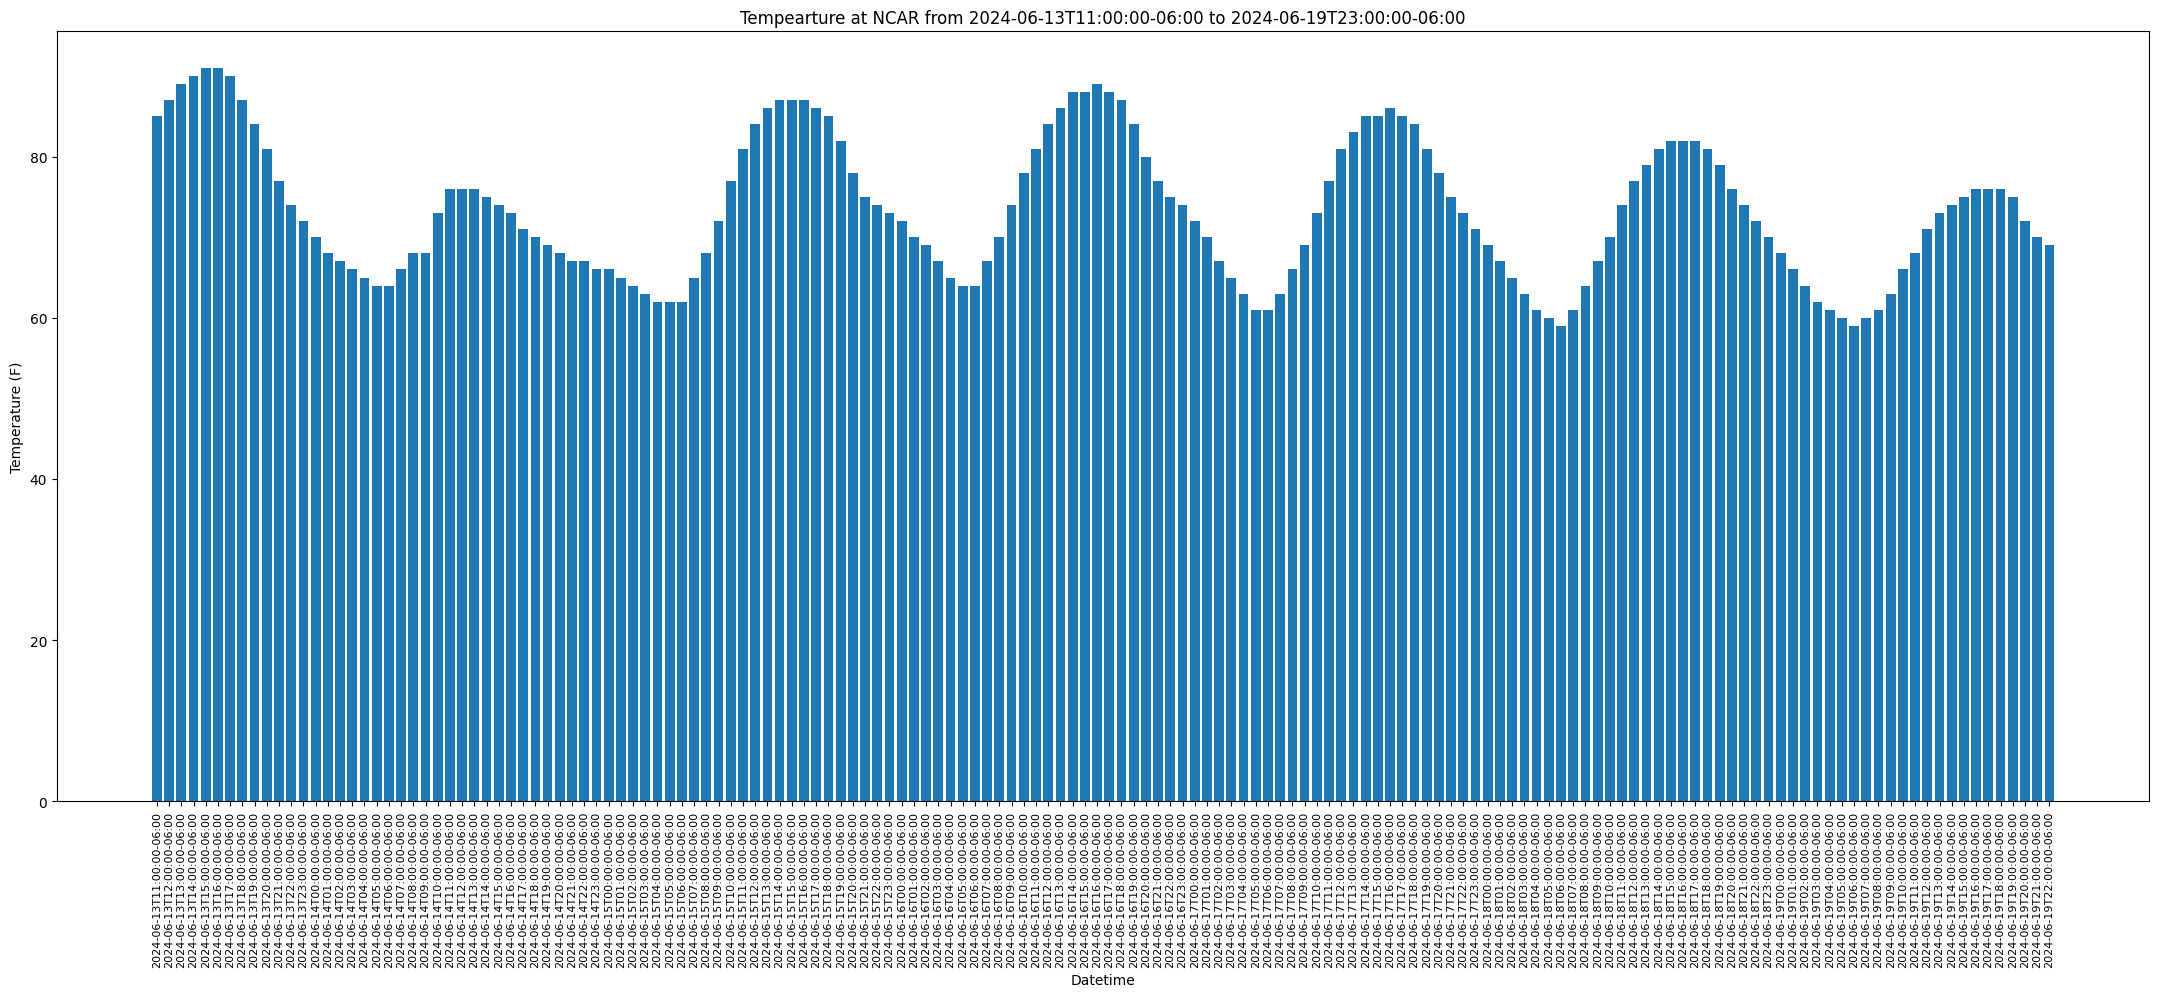

In [81]:
# Plot
fig, ax = plt.subplots(figsize=(27, 10))

# Plot Fireball Locations with Energy
plt.bar(hour_x, temperature)

# Setup Axis Limits and Title/Labels
plt.title(f"Tempearture at NCAR from {datetime_start} to {datetime_end}")
plt.xlabel("Datetime")
plt.xticks(rotation=90, fontsize=8)
plt.ylabel("Temperature (F)")
plt.show()

## Last Section

If you're comfortable, and as we briefly used for our embedded logo up top, you can embed raw html into Jupyter Markdown cells (edit to see):

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Your relevant information here!
</div>

Feel free to copy this around and edit or play around with yourself. Some other `admonitions` you can put in:

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We got this done after all!
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be careful!
</div>

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Scary stuff be here.
</div>

We also suggest checking out Jupyter Book's [brief demonstration](https://jupyterbook.org/content/metadata.html#jupyter-cell-tags) on adding cell tags to your cells in Jupyter Notebook, Lab, or manually. Using these cell tags can allow you to [customize](https://jupyterbook.org/interactive/hiding.html) how your code content is displayed and even [demonstrate errors](https://jupyterbook.org/content/execute.html#dealing-with-code-that-raises-errors) without altogether crashing our loyal army of machines!

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references

- [Python API Tutorial: Getting Started with APIs](https://www.geeksforgeeks.org/python-api-tutorial-getting-started-with-apis/)